
# Project: Investigate a Dataset - [No-show_appoitment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> the data contains appoitment records for a group of patients to indicate if they show up  on the time or didn't show at all, it contains some feature it could be affect on showing up such as the of the patient, sms reminder, neighborhood.


### Question(s) for Analysis
> 1) How many patient shows up vs did'nt show?                                                                                  2) does the gender reflect on showing in the time?                                                                            3) does age reflect on showing up?                                                                                            4) is the duration between the Scheduled day and Appointment day reflect on showing up ?                                        5) does patients who didn't recieve sms messeges miss the appoitment ?                                                          6) does patient who drink alcohol tend to miss the appointment ?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [51]:

df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [53]:
df.duplicated().sum()

0

In [54]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


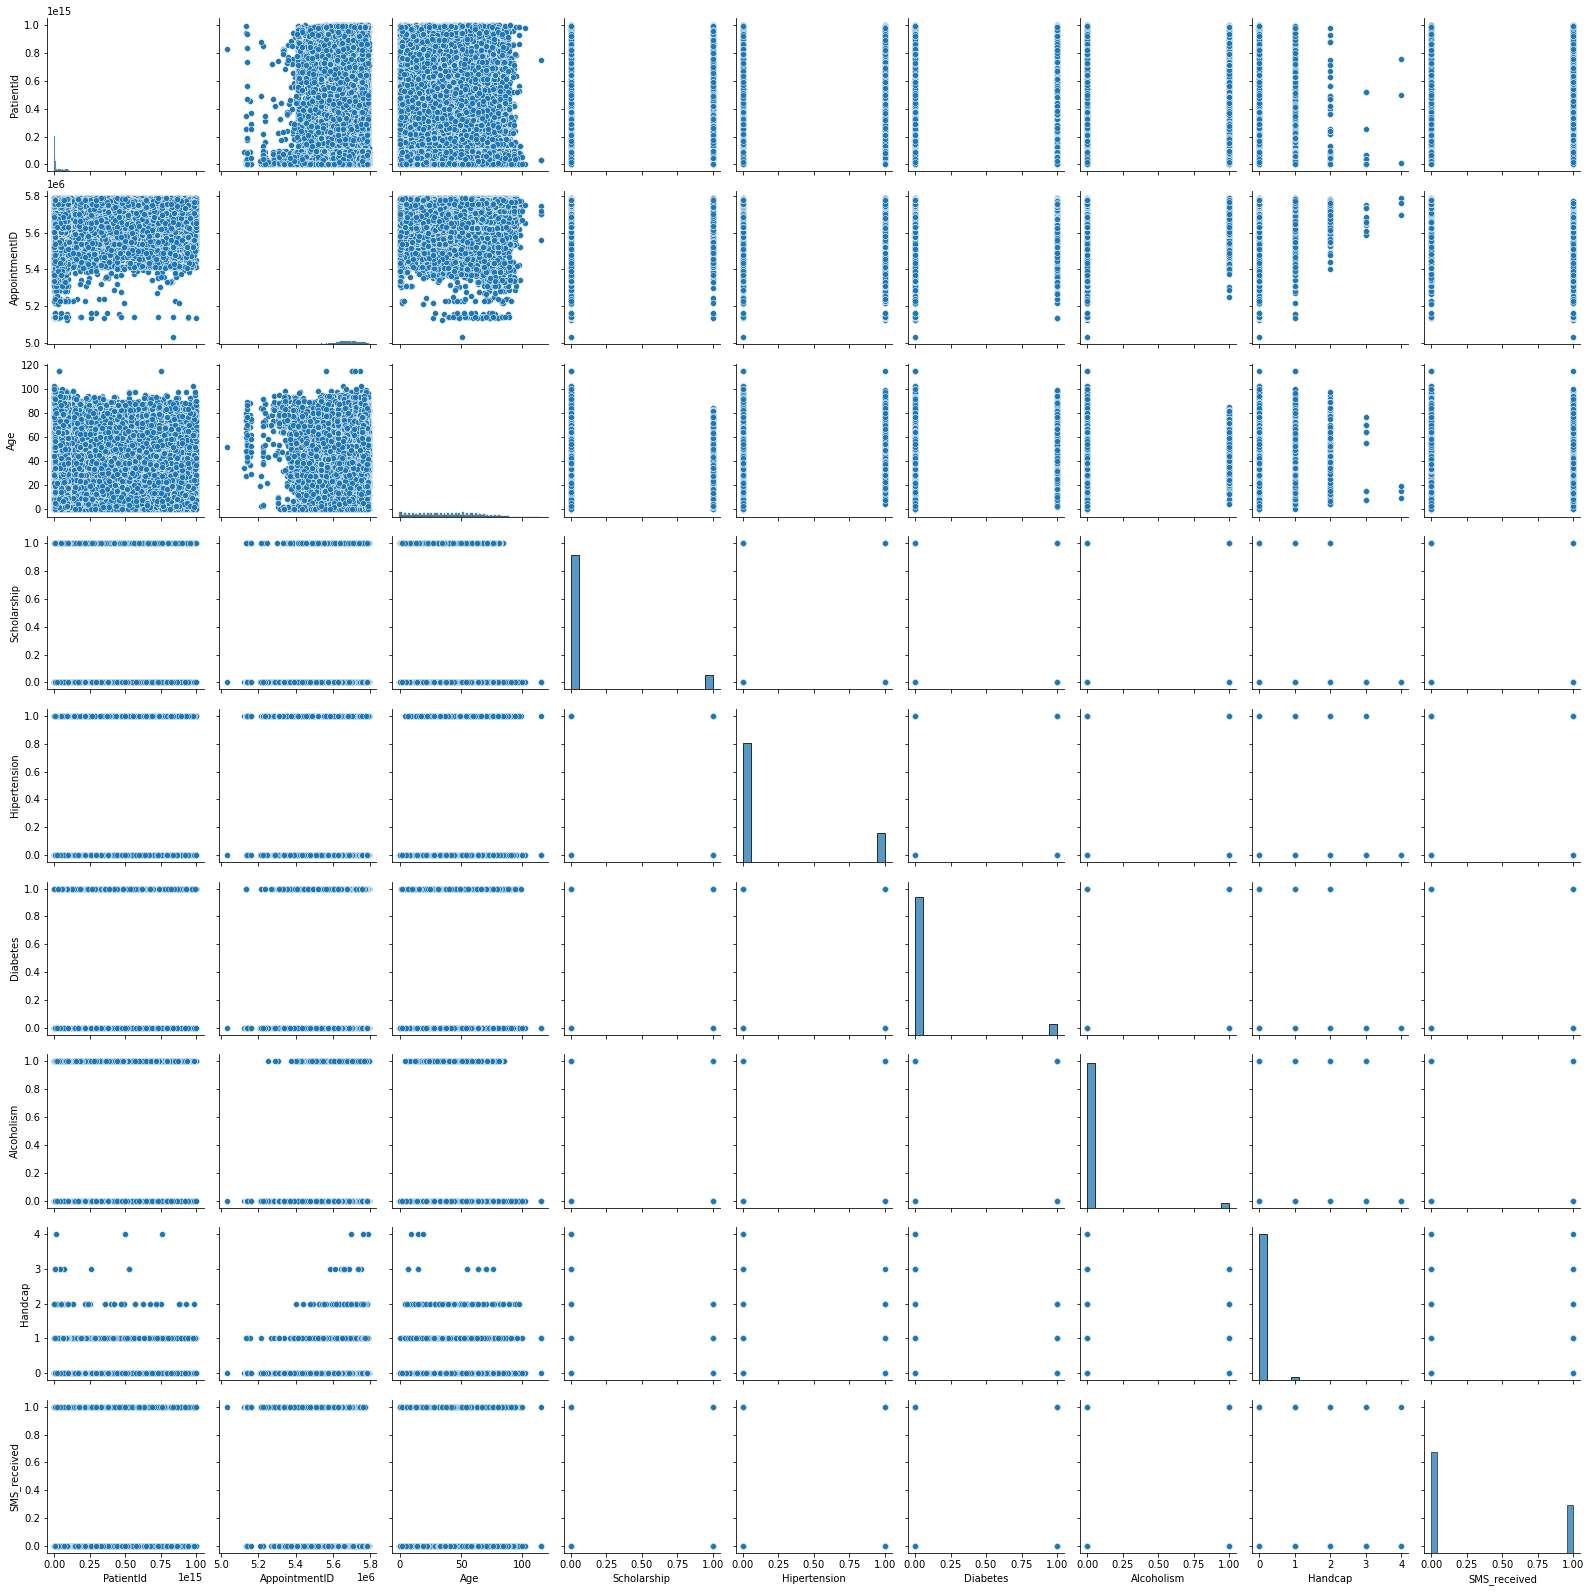

In [6]:
sns.pairplot(df);


# Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

### there is one or  more negative age should be fixed


In [55]:
df = df[df['Age'] != -1]
df['Age'].unique()


array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

### drop appontment Id :

In [56]:
df=df.drop('AppointmentID',1)

### adding 2 new column for further analysing:

In [57]:
df['show'] = df['No-show'].replace({'Yes':0,'No':1})
df['not_show']= df['show'].replace({ 0 : 1 , 1 : 0})

### change the data types

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   Gender          110526 non-null  object 
 2   ScheduledDay    110526 non-null  object 
 3   AppointmentDay  110526 non-null  object 
 4   Age             110526 non-null  int64  
 5   Neighbourhood   110526 non-null  object 
 6   Scholarship     110526 non-null  int64  
 7   Hipertension    110526 non-null  int64  
 8   Diabetes        110526 non-null  int64  
 9   Alcoholism      110526 non-null  int64  
 10  Handcap         110526 non-null  int64  
 11  SMS_received    110526 non-null  int64  
 12  No-show         110526 non-null  object 
 13  show            110526 non-null  int64  
 14  not_show        110526 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 13.5+ MB


In [59]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [60]:
df['show'] = df['show'].astype('int64')

In [61]:
df['Neighbourhood'] = df['Neighbourhood'].astype(str)
df['Gender'] = df['Gender'].astype(str)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   Gender          110526 non-null  object             
 2   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 3   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 4   Age             110526 non-null  int64              
 5   Neighbourhood   110526 non-null  object             
 6   Scholarship     110526 non-null  int64              
 7   Hipertension    110526 non-null  int64              
 8   Diabetes        110526 non-null  int64              
 9   Alcoholism      110526 non-null  int64              
 10  Handcap         110526 non-null  int64              
 11  SMS_received    110526 non-null  int64              
 12  No-show         110526 non-null  object             
 13  show          

In [63]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,show,not_show
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0


<a id='eda'></a>
## Exploratory Data Analysis


In [275]:
def pie_chart(data,labels,title):
    ''' A fuction to draw pie chart'''
    
    plt.pie(data, labels = labels, autopct='%.001f%%', startangle=180,textprops = {"fontsize":15},explode=(0,0.05),radius=1.4)
    plt.title(title,y=1.2,fontdict={'fontsize':15})
    plt.show()


In [352]:

def hist_plot(x, xlabel, ylabel, title=None, bins=None, legend_label=True):
    ''' A function to plot a histgram '''
    plt.figure(figsize=[12,8])
    x.plot(kind='hist',alpha=0.7,title=title,fontsize=12,bins=bins)
    plt.legend(labels=legend_label,fontsize=9)
    plt.ylabel(ylabel,fontsize=12);
    plt.xlabel(xlabel,fontsize=12);
    plt.show()


## 1) How many patient shows up vs did'nt show  

In [331]:
n_of_show = df['show'].sum()
n_not_show = df['show'].count() - n_of_show

In [332]:
print('showed: {} , Didnt show: {}'.format(n_of_show,n_not_show))

showed: 88207 , Didnt show: 22319


In [333]:
plt_data=[n_of_show,n_not_show]
labels= ['they showed on time','they did not show in time']
title='percentage of patients who showed in time'

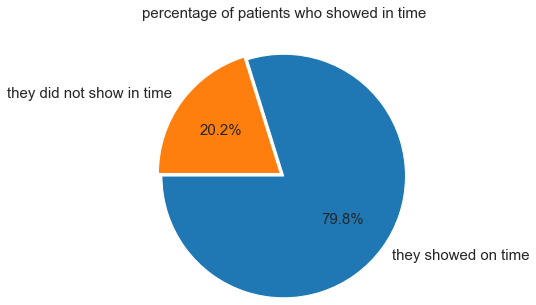

In [334]:
pie_chart(plt_data,labels,title)

# 2) does the gender reflect on showing in the time?
> **to answer this question**: we should get the percentage of who showed to the total patients who have the same gender

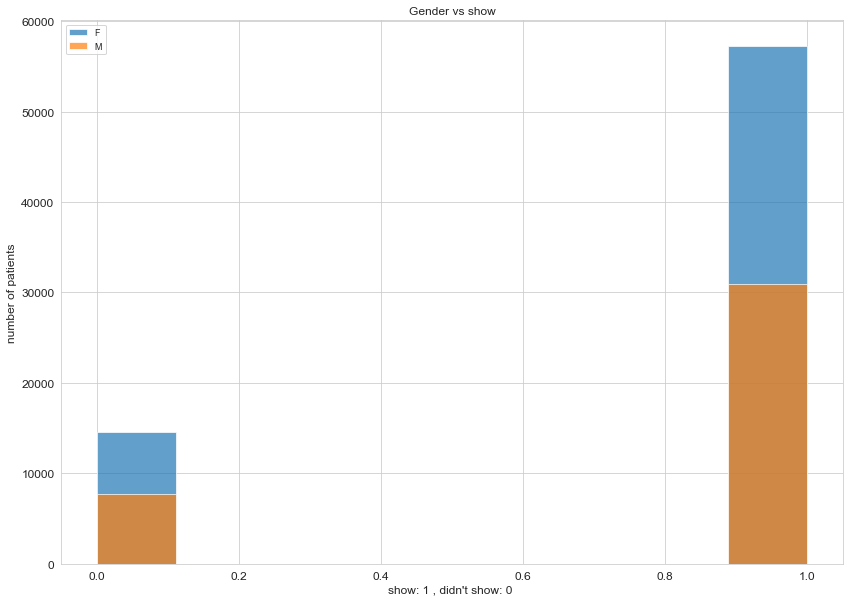

In [335]:
x=df.groupby(['Gender'])['show']
hist_plot(x,"show: 1 , didn't show: 0 ",'number of patients',title = "Gender vs show",bins=9,legend_label=['F','M'])

  > **after some visualization we noticed that gender does not reflect on showing up on the time, maybe we should remove childs from our visualization **

In [317]:
# spliting the adult patients from the data (just openion: mostly parents who deliver their child to hospital)
adult = df.query('Age >= 18')
x = adult.groupby(['Gender'])['show']

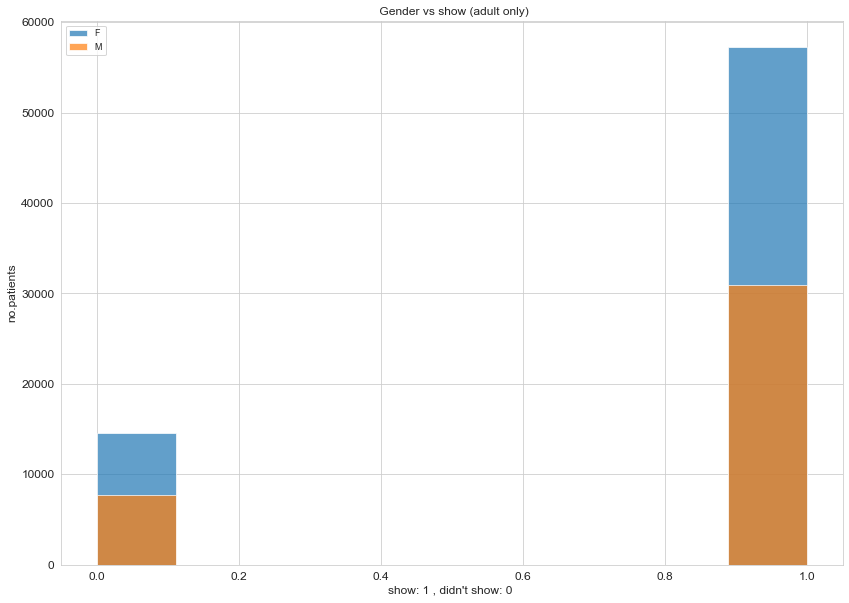

In [336]:
hist_plot( x ,"show: 1 , didn't show: 0 ","no.patients",title = ' Gender vs show (adult only)',bins=9,legend_label=['F','M'])

> **removing childs from our visualization didn't reflect much**

# 3) does age reflect on showing up?
> **to answer this question we need split the data by age: age<18 , 18-25
, 25-35 , 35-45 , 45-55 ,  age > 55**

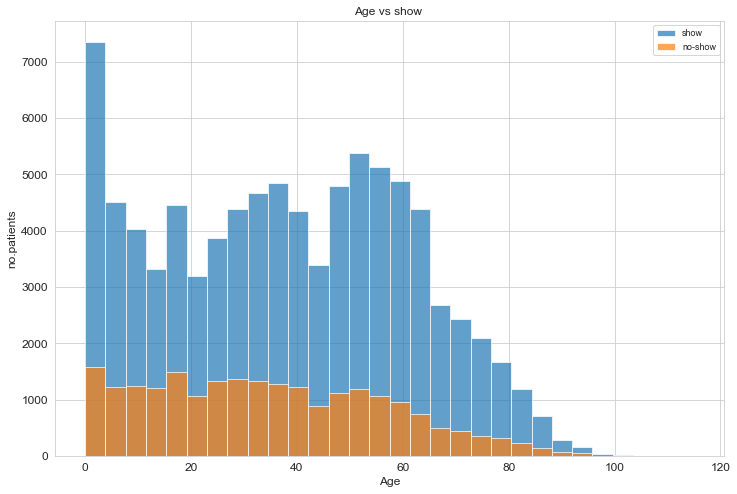

In [353]:
x = df.groupby(['not_show'])['Age']
hist_plot( x ,"Age","no.patients", title = 'Age vs show ', bins=30, legend_label=['show','no-show'])


> ### we saw that patient show up more when they young 

## 4) is the duration between the Scheduled day and Appointment day reflect on showing up ?
> **We need to add one new column for the differnce between ScheduledDay and AppointmentDay**

In [355]:
df['duration']=df['AppointmentDay'].dt.date- df['ScheduledDay'].dt.date
df['duration']=df['duration'].dt.days
df.groupby(['show']).mean()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,not_show,duration
show,,,,,,,,,,
0,1.467523e+14,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,1.0,15.831489
1,1.476809e+14,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337,0.0,8.754759


In [356]:
df['duration'].describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: duration, dtype: float64

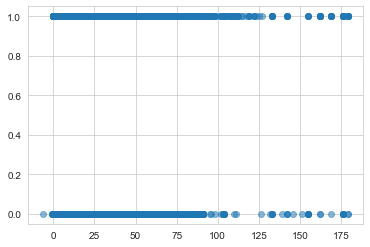

In [357]:
x=df['show']
y=df['duration']
plt.scatter(y, x, alpha=0.5)


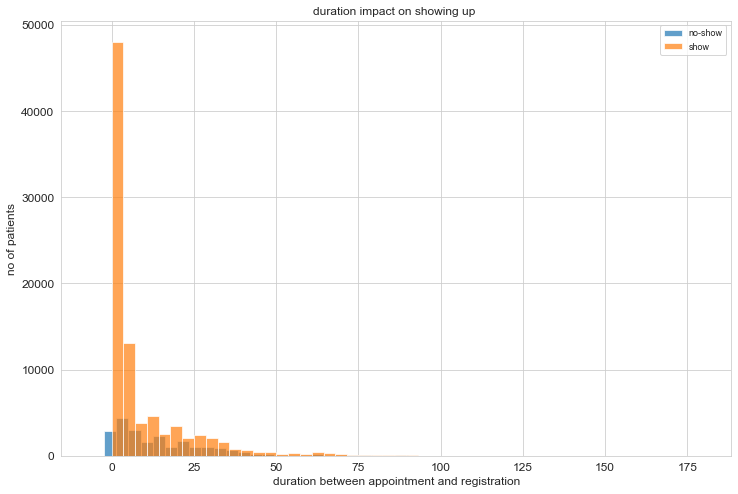

In [358]:
x= df.groupby('show')['duration']
xlabel='duration between appointment and registration'
ylabel = 'no of patients'
hist_plot( x ,xlabel,ylabel , title = 'duration impact on showing up ', bins=50, legend_label=['no-show','show'])


## 5) does patients who didn't recieve sms messeges miss the appoitment ? 

### calculate the percentage between sms_received and did'nt receive

In [359]:
count = df[df['SMS_received']==1].sum()['SMS_received']
count

35482

In [360]:
sms_percentage = count/df.shape[0] *100
print("patient who recieved sms / didn't :{} %".format(sms_percentage))

patient who recieved sms / didn't :32.10285362720084 %


### sms should be affect more than that it seems that has no affect at all (maybe filtering the age will affect!)

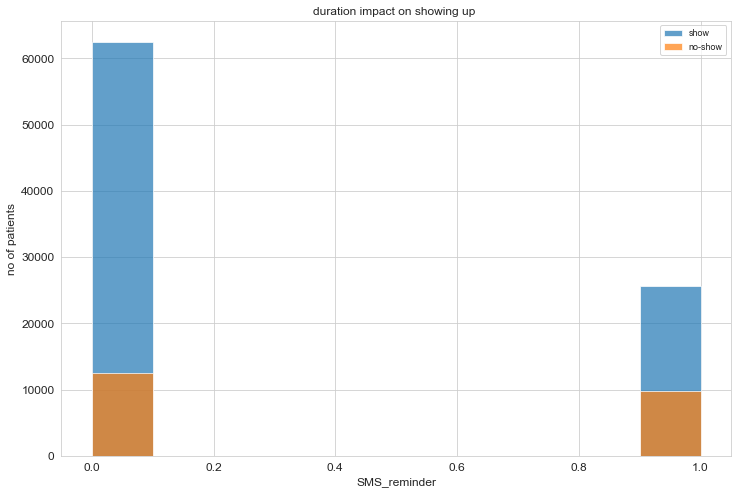

In [361]:
x = df.groupby(['not_show'])['SMS_received']

hist_plot( x ,"SMS_reminder",ylabel , title = 'duration impact on showing up ', bins=10, legend_label=['show','no-show'])

## 

<function matplotlib.pyplot.show(close=None, block=None)>

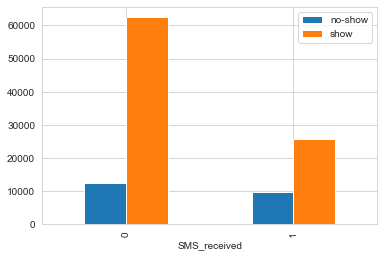

In [362]:
#another way to plot the data
x = df.groupby(['show'])['SMS_received']
x.value_counts().unstack(0).plot.bar()
plt.legend(labels=['no-show','show'])
plt.xticks=["didn't recieve sms","recieved sms"]
plt.show


## 6) does patient who drink alcohol tend to miss the appointment ?

In [363]:
#preview some data
df.groupby(['show']).mean()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,not_show,duration
show,,,,,,,,,,
0,1.467523e+14,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,1.0,15.831489
1,1.476809e+14,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337,0.0,8.754759


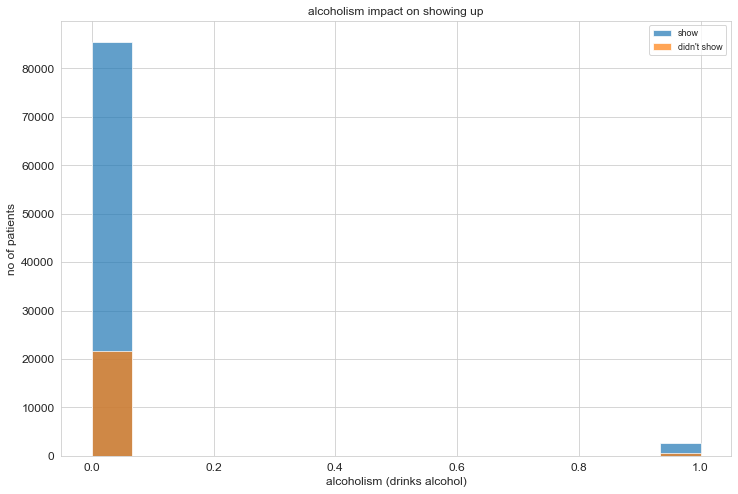

In [420]:
x = df.groupby(['not_show'])['Alcoholism']

hist_plot( x ,"alcoholism (drinks alcohol)",ylabel , title = 'alcoholism impact on showing up', bins=15, legend_label=["show","didn't show"])


## 7) does Neighberhood affect on patients attendance?

In [438]:
show= df.show==1
no_show= df.show==0
x=df.Neighbourhood[show].value_counts()
y=df.Neighbourhood[no_show].value_counts()

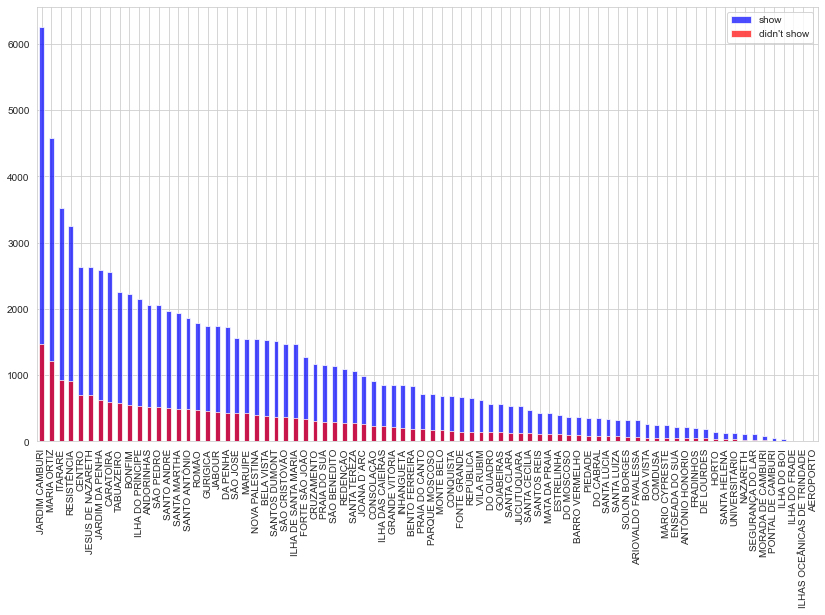

In [437]:
plt.figure(figsize=[14,8])
x.plot(kind='bar',alpha=0.7,color='blue',label='show')
y.plot(kind='bar',alpha=0.7,color='red',label="didn't show")
plt.legend()

<a id='conclusions'></a>
## Conclusions

> age has a high impact on attendance(the patients when getting old intends to miss the appointment), Neighborhood has good impact to and show as that some neighborhoods have patients more than others it could be from the distance to the hospital or from Population density.

> there are some features that do not correlate at all such as alcoholism, gender, SMS reminder which is unexpected


### Limitations
> in the AppointmentDay column there is no day time, I think this could have a high weight on attendance
